In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import shape
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.display.max_columns = 1000

In [2]:
# Reading in the crime data csv file and converting to a dataframe.   
crime_df = pd.read_csv('Crimes_2001_into_2018_Cleaned.csv')

In [3]:
# Examine the first 5 rows of crime_df
crime_df.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
0,10000092,2015-03-18 19:44:00,2015,047XX W OHIO ST,BATTERY,STREET,False,1111,11.0,28.0,25.0,1144606.0,1903566.0,41.891399,-87.744385,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,19,T2,W OHIO ST,No Holiday,False,Cicero,Green Line,0.54,Cicero & Ohio,0.10,MAZE FOOD & LIQUOR INC,0.10,10.09,15.0,2.34
1,10000094,2015-03-18 23:00:00,2015,066XX S MARSHFIELD AVE,OTHER OFFENSE,STREET,False,725,7.0,15.0,67.0,1166468.0,1860715.0,41.773372,-87.665319,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,23,T2,S MARSHFIELD AVE,No Holiday,False,Ashland/63rd,Green Line,0.62,Ashland & 66th Street,0.12,"BIG SAM'S FOOD & LIQUOR, INC.",0.53,12.56,7.0,0.79
2,10000095,2015-03-18 22:45:00,2015,044XX S LAKE PARK AVE,BATTERY,APARTMENT,True,222,2.0,4.0,39.0,1185075.0,1875622.0,41.813861,-87.596643,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S LAKE PARK AVE,No Holiday,False,43rd,Green Line,1.88,Oakenwald & 43rd Street,0.35,"ONE STOP FOOD & LIQUOR STORE, INC.",0.37,7.87,2.0,3.11
3,10000096,2015-03-18 22:30:00,2015,051XX S MICHIGAN AVE,BATTERY,APARTMENT,False,225,2.0,3.0,40.0,1178033.0,1870804.0,41.800802,-87.622619,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,22,T2,S MICHIGAN AVE,No Holiday,False,51st,Green Line,0.37,51st Street & Michigan,0.13,51ST EXPRESS FOOD & LIQUOR INC,0.15,9.01,2.0,0.67
4,10000097,2015-03-18 21:00:00,2015,047XX W ADAMS ST,ROBBERY,SIDEWALK,False,1113,11.0,28.0,25.0,1144920.0,1898709.0,41.878065,-87.743354,3,SPRING,Q1,WEDNESDAY,WEEKDAY,EVENING,18,21,T2,W ADAMS ST,No Holiday,False,Cicero,Blue Line,0.74,Jackson & Kilpatrick,0.13,"NIJAR FOOD & LIQUOR, INC.",0.70,9.96,15.0,2.07


## Getting Location from Block

In [163]:
# Creating a temporary dataframe with null entries for latitude/longitude
loc_null = crime_df[pd.isna(crime_df['Latitude'])]
# Resetting the index for loc_null before moving on
loc_null = loc_null.reset_index(drop = True)

# Creating a temporary dataframe with non-null entries for latitude/longitude
loc_notnull = crime_df[pd.notnull(crime_df['Latitude'])]
# Resetting the index for loc_notnull before moving on
loc_notnull = loc_notnull.reset_index(drop = True)

In [165]:
# Getting a list of unique blocks that need lat/lon
blocks = list(set(loc_null['Block']))
len(blocks)

21398

In [166]:
blocks[:10]

['063XX S GREEN ST',
 '017XX S RUBLE ST',
 '025XX W 43 ST',
 '014XX S LAKE SHORE DR W',
 '046XX W 45TH ST',
 '055XX S PAYNE DR',
 '037XX W THOMAS ST',
 '002XX N JEFFERSON ST',
 '038XX W 59TH PL',
 '056XX S SANGAMON ST']

In [167]:
# For each block, looking up all rows in the non-null df with the same block and grabbing the lat/lon/coords of a random row
lats = []
lons = []
xcoors = []
ycoors = []

blocks = list(set(loc_null['Block']))

for block in blocks:
    df = loc_notnull[loc_notnull['Block'] == block]
    if len(df) > 0:
        df = df.reset_index(drop=True)
        i = np.random.randint(0, len(df))  # Choosing a random row 
        lats.append(df.loc[i, 'Latitude'])
        lons.append(df.loc[i, 'Longitude'])
        xcoors.append(df.loc[i, 'X Coordinate'])
        ycoors.append(df.loc[i, 'Y Coordinate'])
    else:
        lats.append(np.nan)
        lons.append(np.nan)
        xcoors.append(np.nan)
        ycoors.append(np.nan)

In [168]:
# Creating a dataframe of the blocks and their associated locations and saving to a file
df_loc = pd.DataFrame({'Block': blocks, 'Latitude': lats, 'Longitude': lons, 'X Coordinate': xcoors, 'Y Coordinate': ycoors})
df_loc.to_csv('missing_locs.csv', index=False)
df_loc.head()

,Block,Latitude,Longitude,X Coordinate,Y Coordinate
0,063XX S GREEN ST,41.778774,-87.645993,1171724.0,1862725.0
1,017XX S RUBLE ST,41.858218,-87.643807,1172088.0,1891679.0
2,025XX W 43 ST,41.815533,-87.688091,1160141.0,1876031.0
3,014XX S LAKE SHORE DR W,41.863635,-87.619046,1178817.0,1893708.0
4,046XX W 45TH ST,41.811315,-87.739969,1146010.0,1874392.0


## Filling in Missing Locations

In [6]:
df_loc = pd.read_csv('missing_locs.csv')

In [7]:
df_loc.head()

,Block,Latitude,Longitude,X Coordinate,Y Coordinate
0,063XX S GREEN ST,41.778774,-87.645993,1171724.0,1862725.0
1,017XX S RUBLE ST,41.858218,-87.643807,1172088.0,1891679.0
2,025XX W 43 ST,41.815533,-87.688091,1160141.0,1876031.0
3,014XX S LAKE SHORE DR W,41.863635,-87.619046,1178817.0,1893708.0
4,046XX W 45TH ST,41.811315,-87.739969,1146010.0,1874392.0


In [8]:
# Dropping null location values from df_loc
df_loc2 = df_loc[pd.notnull(df_loc['Latitude'])]
len(df_loc2), len(df_loc)

(20251, 21398)

In [9]:
# Creating a temporary dataframe with null entries for latitude/longitude
loc_null = crime_df[pd.isna(crime_df['Latitude'])]
# Resetting the index for loc_null before moving on
loc_null = loc_null.reset_index(drop = True)

# Creating a temporary dataframe with non-null entries for latitude/longitude
loc_notnull = crime_df[pd.notnull(crime_df['Latitude'])]
# Resetting the index for loc_notnull before moving on
loc_notnull = loc_notnull.reset_index(drop = True)

In [10]:
len(loc_null)

60336

In [11]:
loc_null.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
0,10581023,2014-09-01 08:00:00,2014,0000X E LAKE ST,DECEPTIVE PRACTICE,OTHER,False,111,1.0,42.0,32.0,NaN,NaN,NaN,NaN,9,FALL,Q3,MONDAY,WEEKDAY,MORNING,1,8,T1,E LAKE ST,Labor Day,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4755307,2002-01-23 00:00:00,2002,077XX S GREENWOOD AVE,THEFT,APARTMENT,False,624,6.0,8.0,69.0,NaN,NaN,NaN,NaN,1,WINTER,Q1,WEDNESDAY,WEEKDAY,OVERNIGHT,23,0,T3,S GREENWOOD AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4757173,2006-05-22 14:30:00,2006,074XX N ROGERS AVE,MOTOR VEHICLE THEFT,PARKING LOT/GARAGE(NON.RESID.),False,2422,24.0,49.0,1.0,NaN,NaN,NaN,NaN,5,SPRING,Q2,MONDAY,WEEKDAY,AFTERNOON,22,14,T3,N ROGERS AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4759696,2004-10-24 09:00:00,2004,077XX S ESSEX AVE,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,421,4.0,7.0,43.0,NaN,NaN,NaN,NaN,10,FALL,Q4,SUNDAY,WEEKEND,MORNING,24,9,T3,S ESSEX AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4757685,2004-09-03 19:00:00,2004,111XX S VINCENNES AVE,THEFT,GAS STATION,False,2234,22.0,34.0,75.0,NaN,NaN,NaN,NaN,9,FALL,Q3,FRIDAY,WEEKDAY,EVENING,3,19,T1,S VINCENNES AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_loc2.head()

,Block,Latitude,Longitude,X Coordinate,Y Coordinate
0,063XX S GREEN ST,41.778774,-87.645993,1171724.0,1862725.0
1,017XX S RUBLE ST,41.858218,-87.643807,1172088.0,1891679.0
2,025XX W 43 ST,41.815533,-87.688091,1160141.0,1876031.0
3,014XX S LAKE SHORE DR W,41.863635,-87.619046,1178817.0,1893708.0
4,046XX W 45TH ST,41.811315,-87.739969,1146010.0,1874392.0


In [13]:
# Filling in the missing lat/lon and coords in loc_null using blocks in df_loc2
blocks = list(df_loc2['Block'])

for block in blocks:
    loc_null.loc[loc_null['Block'] == block, ['Latitude', 'Longitude', 'X Coordinate', 'Y Coordinate']] = df_loc2.loc[df_loc2['Block'] == block, ['Latitude', 'Longitude', 'X Coordinate', 'Y Coordinate']].values

In [16]:
# Finding how many nulls I have left
len(loc_null), len(loc_null) - len(loc_null.dropna(subset=['Latitude']))

(60336, 2464)

I started out with 60,336 rows missing the latitude, longitude, and coordinates.  I have reduced the number of rows missing these values to 2,464. 

In [17]:
loc_null.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
0,10581023,2014-09-01 08:00:00,2014,0000X E LAKE ST,DECEPTIVE PRACTICE,OTHER,False,111,1.0,42.0,32.0,1176970.0,1901745.0,41.885731,-87.625583,9,FALL,Q3,MONDAY,WEEKDAY,MORNING,1,8,T1,E LAKE ST,Labor Day,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4755307,2002-01-23 00:00:00,2002,077XX S GREENWOOD AVE,THEFT,APARTMENT,False,624,6.0,8.0,69.0,1184894.0,1853906.0,41.754274,-87.597988,1,WINTER,Q1,WEDNESDAY,WEEKDAY,OVERNIGHT,23,0,T3,S GREENWOOD AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4757173,2006-05-22 14:30:00,2006,074XX N ROGERS AVE,MOTOR VEHICLE THEFT,PARKING LOT/GARAGE(NON.RESID.),False,2422,24.0,49.0,1.0,1163292.0,1949258.0,42.016407,-87.674469,5,SPRING,Q2,MONDAY,WEEKDAY,AFTERNOON,22,14,T3,N ROGERS AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4759696,2004-10-24 09:00:00,2004,077XX S ESSEX AVE,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,421,4.0,7.0,43.0,1194206.0,1854040.0,41.754419,-87.563859,10,FALL,Q4,SUNDAY,WEEKEND,MORNING,24,9,T3,S ESSEX AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4757685,2004-09-03 19:00:00,2004,111XX S VINCENNES AVE,THEFT,GAS STATION,False,2234,22.0,34.0,75.0,1166985.0,1830593.0,41.690701,-87.664283,9,FALL,Q3,FRIDAY,WEEKDAY,EVENING,3,19,T1,S VINCENNES AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Combining loc_null and loc_notnull
crime_df_new = pd.concat([loc_null, loc_notnull])

In [19]:
# Checking lengths of old and new dfs
len(crime_df_new), len(crime_df)

(6726512, 6726512)

In [20]:
crime_df_new.tail()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
6666171,11480703,2018-10-15 08:00:00,2018,0000X S MIDWAY ST,THEFT,AIRPORT PARKING LOT,False,813,8.0,23.0,56.0,1145919.0,1866019.0,41.788340,-87.740514,10,FALL,Q4,MONDAY,WEEKDAY,MORNING,15,8,T2,S MIDWAY ST,No Holiday,False,Midway,Orange Line,0.29,Midway Orange Line Station,0.22,MATTHEWS FOOD & LIQUORS INC,1.24,14.23,8.0,2.82
6666172,11480937,2018-10-15 12:00:00,2018,028XX S PRINCETON AVE,BATTERY,"SCHOOL, PRIVATE, BUILDING",False,914,9.0,11.0,34.0,1174751.0,1885872.0,41.842224,-87.634206,10,FALL,Q4,MONDAY,WEEKDAY,AFTERNOON,15,12,T2,S PRINCETON AVE,No Holiday,False,Cermak-Chinatown,Red Line,1.25,Wentworth & 28th Place,0.21,"LINA FOOD & LIQUOR, INC",1.14,4.50,9.0,1.14
6666173,2332159,2002-09-05 10:21:00,2002,027XX W 14TH ST,BATTERY,RESIDENCE PORCH/HALLWAY,False,1023,10.0,28.0,29.0,1158111.0,1893164.0,41.862590,-87.695071,9,FALL,Q3,THURSDAY,WEEKDAY,MORNING,5,10,T1,W 14TH ST,No Holiday,False,California,Pink Line,0.94,California & 14th Street,0.05,H & K FOODS & LIQUORS INC,0.52,6.33,10.0,1.28
6666174,24234,2018-10-15 01:30:00,2018,070XX S PRAIRIE AVE,HOMICIDE,HOUSE,True,322,3.0,6.0,69.0,1179260.0,1858331.0,41.766547,-87.618500,10,FALL,Q4,MONDAY,WEEKDAY,OVERNIGHT,15,1,T2,S PRAIRIE AVE,No Holiday,False,69th,Red Line,0.63,71st Street & Prairie,0.09,"A & G LIQUORS, INC.",0.54,12.82,3.0,1.06
6666175,24235,2018-10-15 11:58:00,2018,017XX W 85TH ST,HOMICIDE,ALLEY,False,614,6.0,18.0,71.0,1166266.0,1848330.0,41.739390,-87.666412,10,FALL,Q4,MONDAY,WEEKDAY,MORNING,15,11,T2,W 85TH ST,No Holiday,False,87th,Red Line,3.49,Ashland & 85th Street,0.26,BEVERLY FOOD & LIQUOR INC,0.44,16.24,6.0,2.32


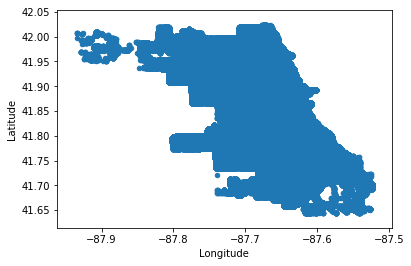

In [21]:
# Checking that lat/lon look ok
crime_df_new.plot.scatter(x='Longitude', y='Latitude')

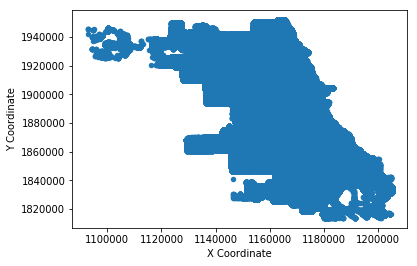

In [22]:
# Checking that coordinates look ok
crime_df_new.plot.scatter(x='X Coordinate', y='Y Coordinate')

## Filling in Missing Wards

In [51]:
# Creating a temporary dataframe with null entries for ward
ward_null = crime_df_new[pd.isna(crime_df_new['Ward'])]
# Resetting the index for ward_null before moving on
ward_null = ward_null.reset_index(drop = True)

# Creating a temporary dataframe with non-null entries for ward
ward_notnull = crime_df_new[pd.notnull(crime_df_new['Ward'])]
# Resetting the index for ward_notnull before moving on
ward_notnull = ward_notnull.reset_index(drop = True)

In [58]:
# Seeing which years had the most missing wards
ward_null['Year'].value_counts()

2001    481619
2002    133121
2004        22
2003        19
2010        18
2011        14
2012         7
2007         5
2008         4
2006         3
2009         3
2013         3
2014         2
2015         2
2018         2
2017         1
2005         1
Name: Year, dtype: int64

In [32]:
# Reading in wards polygon csv
ward_poly = pd.read_csv('WARDS_2015.csv')

In [33]:
ward_poly.head()

,the_geom,WARD,SHAPE_Leng,SHAPE_Area
0,MULTIPOLYGON (((-87.69623470134458 41.85755495...,12,93073.340838,1.160965e+08
1,MULTIPOLYGON (((-87.66288923669032 41.79883809...,16,97901.323833,1.031436e+08
2,MULTIPOLYGON (((-87.69817510963803 41.81729440...,15,82183.694820,6.558830e+07
3,MULTIPOLYGON (((-87.65524133440029 41.80883316...,20,90105.195618,1.372904e+08
4,MULTIPOLYGON (((-87.66420403810295 42.02126158...,49,38122.692826,4.973346e+07


In [34]:
# Extracting only columns I need
ward_poly = ward_poly[['the_geom', 'WARD']]

# Renaming columns
ward_poly.columns = ['geometry', 'ward']
ward_poly.head()

,geometry,ward
0,MULTIPOLYGON (((-87.69623470134458 41.85755495...,12
1,MULTIPOLYGON (((-87.66288923669032 41.79883809...,16
2,MULTIPOLYGON (((-87.69817510963803 41.81729440...,15
3,MULTIPOLYGON (((-87.65524133440029 41.80883316...,20
4,MULTIPOLYGON (((-87.66420403810295 42.02126158...,49


In [40]:
# Cleaning up the geometry column and making a list of coordinates for each ward
coords_list = []

for i in np.arange(len(ward_poly)):
    poly_list = ward_poly.loc[i, 'geometry']
    poly = poly_list.replace('MULTIPOLYGON ', '')
    poly = poly.replace('(', '')
    poly = poly.replace(')', '')
    poly = poly.split(', ')
    
    lats = []
    lons = []
    for pair in poly:
        x, y = pair.split(' ')
        lons.append(float(x))
        lats.append(float(y))
        coords = list(zip(lons, lats))
    coords_list.append(coords)

# Adding list of coordinates to ward_poly
ward_poly['coords'] = coords_list

In [42]:
ward_poly.head()

,geometry,ward,coords
0,MULTIPOLYGON (((-87.69623470134458 41.85755495...,12,"[(-87.69623470134458, 41.857554952383886), (-8..."
1,MULTIPOLYGON (((-87.66288923669032 41.79883809...,16,"[(-87.66288923669032, 41.79883809868242), (-87..."
2,MULTIPOLYGON (((-87.69817510963803 41.81729440...,15,"[(-87.69817510963803, 41.81729440755995), (-87..."
3,MULTIPOLYGON (((-87.65524133440029 41.80883316...,20,"[(-87.65524133440029, 41.80883316182794), (-87..."
4,MULTIPOLYGON (((-87.66420403810295 42.02126158...,49,"[(-87.66420403810295, 42.02126158052747), (-87..."


In [60]:
ward_null.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
0,757,2001-04-12 21:32:00,2001,056XX S NORMAL AV,HOMICIDE,STREET,False,711,7.0,20.0,NaN,1173875.0,1867697.0,41.792370,-87.637960,4,SPRING,Q2,THURSDAY,WEEKDAY,EVENING,12,21,T2,S NORMAL AV,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,808,2001-05-06 01:30:00,2001,020XX W 55 ST,HOMICIDE,AUTO,False,915,9.0,NaN,NaN,NaN,NaN,NaN,NaN,5,SPRING,Q2,SUNDAY,WEEKEND,OVERNIGHT,6,1,T1,W 55 ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8389450,2008-04-15 15:00:00,2008,081XX W CATHERINE AVE,THEFT,RESIDENCE,True,1611,16.0,41.0,NaN,1120943.0,1934726.0,41.977319,-87.830619,4,SPRING,Q2,TUESDAY,WEEKDAY,AFTERNOON,15,15,T2,W CATHERINE AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,937,2001-07-15 00:34:00,2001,030XX S HARDING ST,HOMICIDE,STREET,False,1031,10.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,OVERNIGHT,15,0,T2,S HARDING ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,983,2001-07-29 10:15:00,2001,011XX N LASALLE ST,HOMICIDE,ALLEY,False,1824,18.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,MORNING,29,10,T3,N LASALLE ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Iterating through ward_null and finding the missing ward based on the lat/lon
for row in ward_null.itertuples():
    if pd.notna(row[14]):                                # if latitude is not null
        p1 = Point(float(row[15]), float(row[14]))       # convert longitude/latitude to shapely point
        for i in np.arange(len(ward_poly)):
            coords = ward_poly.loc[i, 'coords']
            polyshape = Polygon(coords)                  # create shapely polygon out of the coordinates
            if p1.within(polyshape):                     # check to see if the point falls within the ward polygon, if it does, assign the ward to that report
                ward_null.loc[row[0], 'Ward'] = ward_poly.loc[i, 'ward']
                break

In [62]:
ward_null.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
0,757,2001-04-12 21:32:00,2001,056XX S NORMAL AV,HOMICIDE,STREET,False,711,7.0,20.0,NaN,1173875.0,1867697.0,41.792370,-87.637960,4,SPRING,Q2,THURSDAY,WEEKDAY,EVENING,12,21,T2,S NORMAL AV,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,808,2001-05-06 01:30:00,2001,020XX W 55 ST,HOMICIDE,AUTO,False,915,9.0,NaN,NaN,NaN,NaN,NaN,NaN,5,SPRING,Q2,SUNDAY,WEEKEND,OVERNIGHT,6,1,T1,W 55 ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8389450,2008-04-15 15:00:00,2008,081XX W CATHERINE AVE,THEFT,RESIDENCE,True,1611,16.0,41.0,NaN,1120943.0,1934726.0,41.977319,-87.830619,4,SPRING,Q2,TUESDAY,WEEKDAY,AFTERNOON,15,15,T2,W CATHERINE AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,937,2001-07-15 00:34:00,2001,030XX S HARDING ST,HOMICIDE,STREET,False,1031,10.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,OVERNIGHT,15,0,T2,S HARDING ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,983,2001-07-29 10:15:00,2001,011XX N LASALLE ST,HOMICIDE,ALLEY,False,1824,18.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,MORNING,29,10,T3,N LASALLE ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Seeing how many rows I saved
len(ward_null), len(ward_null) - len(ward_null.dropna(subset=['Ward']))

(614846, 2952)

I started out with 614,846 rows missing the ward.  I have reduced the number of rows missing the ward to 2952. 

In [64]:
# Combining ward_null and ward_notnull
crime_df_new = pd.concat([ward_null, ward_notnull])

In [65]:
# Checking lengths of old and new dfs
len(crime_df_new), len(crime_df)

(6726512, 6726512)

In [66]:
crime_df_new.head()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
0,757,2001-04-12 21:32:00,2001,056XX S NORMAL AV,HOMICIDE,STREET,False,711,7.0,20.0,NaN,1173875.0,1867697.0,41.792370,-87.637960,4,SPRING,Q2,THURSDAY,WEEKDAY,EVENING,12,21,T2,S NORMAL AV,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,808,2001-05-06 01:30:00,2001,020XX W 55 ST,HOMICIDE,AUTO,False,915,9.0,NaN,NaN,NaN,NaN,NaN,NaN,5,SPRING,Q2,SUNDAY,WEEKEND,OVERNIGHT,6,1,T1,W 55 ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8389450,2008-04-15 15:00:00,2008,081XX W CATHERINE AVE,THEFT,RESIDENCE,True,1611,16.0,41.0,NaN,1120943.0,1934726.0,41.977319,-87.830619,4,SPRING,Q2,TUESDAY,WEEKDAY,AFTERNOON,15,15,T2,W CATHERINE AVE,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,937,2001-07-15 00:34:00,2001,030XX S HARDING ST,HOMICIDE,STREET,False,1031,10.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,OVERNIGHT,15,0,T2,S HARDING ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,983,2001-07-29 10:15:00,2001,011XX N LASALLE ST,HOMICIDE,ALLEY,False,1824,18.0,NaN,NaN,NaN,NaN,NaN,NaN,7,SUMMER,Q3,SUNDAY,WEEKEND,MORNING,29,10,T3,N LASALLE ST,No Holiday,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Saving updated dataframe
crime_df_new.to_csv('crime_df_new_ward.csv', index=False)

## Filling in Missing Communities

In [73]:
# Creating a temporary dataframe with null entries for community
comm_null = crime_df_new[pd.isna(crime_df_new['Community'])]
# Resetting the index for comm_null before moving on
comm_null = comm_null.reset_index(drop = True)

# Creating a temporary dataframe with non-null entries for community
comm_notnull = crime_df_new[pd.notnull(crime_df_new['Community'])]
# Resetting the index for comm_notnull before moving on
comm_notnull = comm_notnull.reset_index(drop = True)

In [74]:
# Reading in community polygon csv
comm_poly = pd.read_csv('CommAreas.csv')
comm_poly.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


In [75]:
# Grabbing the columns I need and changing the column names
comm_poly = comm_poly[['the_geom', 'AREA_NUM_1']]
comm_poly.columns = ['geometry', 'community']
comm_poly.head()

,geometry,community
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,35
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,36
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,37
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,38
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,39


In [78]:
# Cleaning up the geometry column and making a list of coordinates for each community
coords_list = []

for i in np.arange(len(comm_poly)):
    poly_list = comm_poly.loc[i, 'geometry']
    poly = poly_list.replace('MULTIPOLYGON ', '')
    poly = poly.replace('(', '')
    poly = poly.replace(')', '')
    poly = poly.split(', ')
    
    lats = []
    lons = []
    for pair in poly:
        x, y = pair.split(' ')
        lons.append(float(x))
        lats.append(float(y))
        coords = list(zip(lons, lats))
    coords_list.append(coords)

# Adding list of coordinates to comm_poly
comm_poly['coords'] = coords_list

In [79]:
# Iterating through comm_null and finding the missing community based on the lat/lon
for row in comm_null.itertuples():
    if pd.notna(row[14]):                             # if latitude is not null
        p1 = Point(float(row[15]), float(row[14]))    # convert longitude/latitude to shapely point
        for i in np.arange(len(comm_poly)):
            coords = comm_poly.loc[i, 'coords']
            polyshape = Polygon(coords)               # creates shapely polygon out of coordinates
            if p1.within(polyshape):                  # check to see if the point falls within the ward polygon, if it does, assign the community to that report
                comm_null.loc[row[0], 'Community'] = comm_poly.loc[i, 'community']
                break

In [80]:
# Seeing how many rows I saved
len(comm_null), len(comm_null) - len(comm_null.dropna(subset=['Community']))

(616113, 2710)

I started out with 616,113 rows missing the community.  I have reduced the number of rows missing the community to 2710. 

In [81]:
# Combining comm_null and comm_notnull
crime_df_new = pd.concat([comm_null, comm_notnull])

In [82]:
# Checking lengths of old and new dfs
len(crime_df_new), len(crime_df)

(6726512, 6726512)

In [83]:
crime_df_new.tail()

,ID,Date,Year,Block,Primary Type,Location Description,Domestic,Beat,District,Ward,Community,X Coordinate,Y Coordinate,Latitude,Longitude,Month,Season,Quarter of Year,Day of the Week,Day Type,Time of Day,Day,Hour,Third of Month,Street,Holiday,Is Holiday,Closest Train Stop,Closest Train Line,Distance from Closest Train Stop (km),Closest Bus Stop,Distance from Closest Bus Stop (km),Closest Liquor Store,Distance from Closest Liquor Store (km),Distance from Chicago (km),Closest Police Station (District),Distance from Closest Police Station (km)
6110394,11480703,2018-10-15 08:00:00,2018,0000X S MIDWAY ST,THEFT,AIRPORT PARKING LOT,False,813,8.0,23.0,56.0,1145919.0,1866019.0,41.788340,-87.740514,10,FALL,Q4,MONDAY,WEEKDAY,MORNING,15,8,T2,S MIDWAY ST,No Holiday,False,Midway,Orange Line,0.29,Midway Orange Line Station,0.22,MATTHEWS FOOD & LIQUORS INC,1.24,14.23,8.0,2.82
6110395,11480937,2018-10-15 12:00:00,2018,028XX S PRINCETON AVE,BATTERY,"SCHOOL, PRIVATE, BUILDING",False,914,9.0,11.0,34.0,1174751.0,1885872.0,41.842224,-87.634206,10,FALL,Q4,MONDAY,WEEKDAY,AFTERNOON,15,12,T2,S PRINCETON AVE,No Holiday,False,Cermak-Chinatown,Red Line,1.25,Wentworth & 28th Place,0.21,"LINA FOOD & LIQUOR, INC",1.14,4.50,9.0,1.14
6110396,2332159,2002-09-05 10:21:00,2002,027XX W 14TH ST,BATTERY,RESIDENCE PORCH/HALLWAY,False,1023,10.0,28.0,29.0,1158111.0,1893164.0,41.862590,-87.695071,9,FALL,Q3,THURSDAY,WEEKDAY,MORNING,5,10,T1,W 14TH ST,No Holiday,False,California,Pink Line,0.94,California & 14th Street,0.05,H & K FOODS & LIQUORS INC,0.52,6.33,10.0,1.28
6110397,24234,2018-10-15 01:30:00,2018,070XX S PRAIRIE AVE,HOMICIDE,HOUSE,True,322,3.0,6.0,69.0,1179260.0,1858331.0,41.766547,-87.618500,10,FALL,Q4,MONDAY,WEEKDAY,OVERNIGHT,15,1,T2,S PRAIRIE AVE,No Holiday,False,69th,Red Line,0.63,71st Street & Prairie,0.09,"A & G LIQUORS, INC.",0.54,12.82,3.0,1.06
6110398,24235,2018-10-15 11:58:00,2018,017XX W 85TH ST,HOMICIDE,ALLEY,False,614,6.0,18.0,71.0,1166266.0,1848330.0,41.739390,-87.666412,10,FALL,Q4,MONDAY,WEEKDAY,MORNING,15,11,T2,W 85TH ST,No Holiday,False,87th,Red Line,3.49,Ashland & 85th Street,0.26,BEVERLY FOOD & LIQUOR INC,0.44,16.24,6.0,2.32


In [84]:
# Saving updated dataframe
crime_df_new.to_csv('Crimes_2001_into_2018_Cleaned.csv', index=False)

In [89]:
# Examining district counts for reports that have locations but are missing the community
crime_df_new[pd.isna(crime_df_new['Community']) & pd.notna(crime_df_new['Latitude'])]['District'].value_counts()

16.0    128
24.0    118
25.0     84
8.0      66
15.0     34
22.0     30
5.0      19
18.0     14
17.0      8
10.0      4
11.0      3
3.0       1
Name: District, dtype: int64

In [90]:
# Examining district counts for reports that have locations but are missing the ward
crime_df_new[pd.isna(crime_df_new['Ward']) & pd.notna(crime_df_new['Latitude'])]['District'].value_counts()

16.0    422
24.0    118
25.0     84
8.0      63
15.0     34
22.0     30
5.0      18
18.0     14
17.0      8
11.0      3
3.0       1
Name: District, dtype: int64

Police districts 16 and 24 had the most reports missing ward or community.  They are the north/northwestern most districts and district 16 (the northwestern most district) is made up of two areas that have a gap between them.  Therefore it makes sense that the number of reports missing ward or community was higher than those missing location since there likely were several positions that fell outside of these boundaries.  